In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
from collections import Counter

"""
Download the necessary datasets from the following links:

# SemEval
- Training data: https://drive.google.com/file/d/1HeCgnLuDoUHhP-2OsTSSC3FXRLVoI6OG/view?usp=drive_link
- Development data: https://drive.google.com/file/d/1e_G-9a66AryHxBOwGWhriePYCCa4_29e/view?usp=drive_link
- Test data: https://drive.google.com/file/d/1-TN7sfSK1BuYHXlqxHHfwjEIE0JfarPk/view?usp=drive_link

# GenAI
- Training data: https://drive.google.com/file/d/1o8LE5p5xRdEFGrZOKiY4In2xW2BiWJbG/view?usp=drive_link
- Development data: https://drive.google.com/file/d/1hYIHqU3IMnJjPMTvl99K8pQUIOe7a957/view?usp=drive_link
"""

#--LOAD DATA--
# Get text data and corresponding labels from JSONL file (for train and validation sets)
def get_texts_labels(file_path):
    """
    Method to extract texts and labels from a JSONL file.
    Args:
    file_path : str : path to the JSONL file

    Returns:
    texts : list : list of text samples
    labels : list : list of labels corresponding to texts
    """
    texts = []
    labels = []

    # Open and read JSONL file
    with open(file_path, 'r') as f:
        for line in f:
            record = json.loads(line.strip())  # parse each line from a JSON-formatted string into a dictionary after removing leading and trailing whitespace or newline characters
            texts.append(record['text'])  # append 'text' field to texts list
            labels.append(record['label'])  # append 'label' field to labels list

    return texts, labels

# Path to JSONL files
file_path = '/content/drive/MyDrive/project/COMP6781_MNBvBERT_MGTDetect-main'
SemEval_train_file_path = file_path + '/SemEval_data/subtaskA_train_monolingual.jsonl'
SemEval_val_file_path = file_path + '/SemEval_data/subtaskA_dev_monolingual.jsonl'
SemEval_test_file_path = file_path + '/SemEval_data/subtaskA_monolingual_test1.jsonl'
GenAI_train_file_path = file_path + '/GenAI_data/en_train.jsonl'
GenAI_val_file_path = file_path + '/GenAI_data/en_dev.jsonl'
GenAI_test_file_path = file_path + '/GenAI_data/en_test.jsonl'

# Create the datasets and corresponding labels
SemEval_train_texts, SemEval_train_labels = get_texts_labels(SemEval_train_file_path) # SemEval train
SemEval_val_texts, SemEval_val_labels = get_texts_labels(SemEval_val_file_path) # SemEval val
SemEval_test_texts, SemEval_test_labels = get_texts_labels(SemEval_test_file_path)  # SemEval test
GenAI_train_texts, GenAI_train_labels = get_texts_labels(GenAI_train_file_path) # GenAI train
GenAI_val_texts, GenAI_val_labels = get_texts_labels(GenAI_val_file_path) # GenAI val



# Count and print class distribution for each dataset
def print_class_distribution(labels, dataset_name):
    """
    Prints the class distribution for a given dataset.

    Args:
    labels : list : list of labels
    dataset_name : str : name of the dataset for identification
    """
    label_counts = Counter(labels)
    print(f"Class distribution for {dataset_name}:")
    for label, count in label_counts.items():
        print(f"  Label {label}: {count} samples")
    print()

# Print class distribution for all datasets
print_class_distribution(SemEval_train_labels, "SemEval Train")
print_class_distribution(SemEval_val_labels, "SemEval Validation")
print_class_distribution(SemEval_test_labels, "SemEval Test")
print_class_distribution(GenAI_train_labels, "GenAI Train")
print_class_distribution(GenAI_val_labels, "GenAI Validation")

Class distribution for SemEval Train:
  Label 1: 56406 samples
  Label 0: 63351 samples

Class distribution for SemEval Validation:
  Label 1: 2500 samples
  Label 0: 2500 samples

Class distribution for SemEval Test:
  Label 0: 16272 samples
  Label 1: 18000 samples

Class distribution for GenAI Train:
  Label 1: 381845 samples
  Label 0: 228922 samples

Class distribution for GenAI Validation:
  Label 1: 163430 samples
  Label 0: 98328 samples



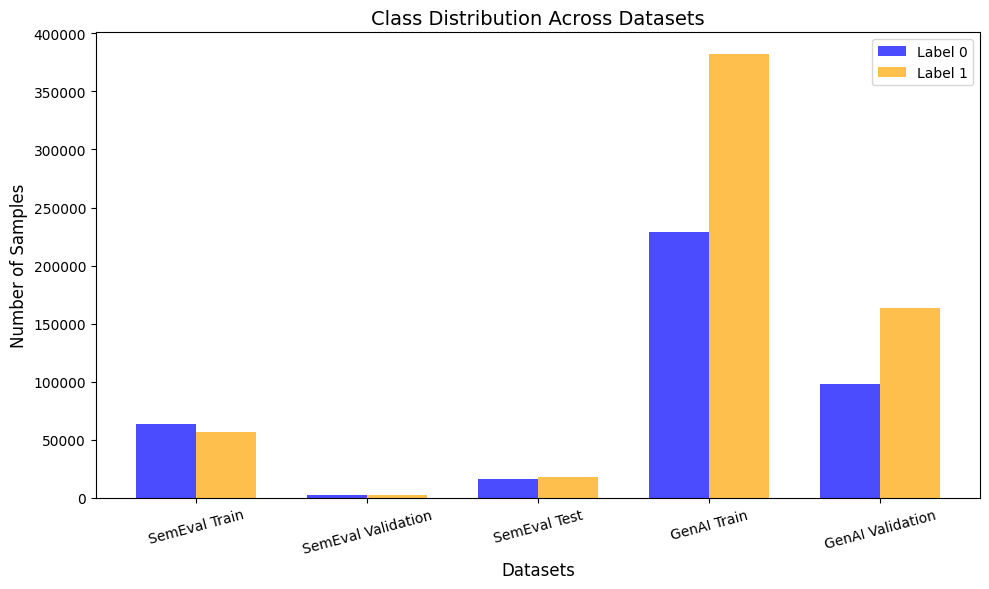

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
datasets = ["SemEval Train", "SemEval Validation", "SemEval Test", "GenAI Train", "GenAI Validation"]
label_0_counts = [63351, 2500, 16272, 228922, 98328]
label_1_counts = [56406, 2500, 18000, 381845, 163430]

# Setting the bar width
bar_width = 0.35

# Positions for bars
indices = np.arange(len(datasets))

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(indices, label_0_counts, bar_width, label='Label 0', color='blue', alpha=0.7)
plt.bar(indices + bar_width, label_1_counts, bar_width, label='Label 1', color='orange', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel("Datasets", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.title("Class Distribution Across Datasets", fontsize=14)
plt.xticks(indices + bar_width / 2, datasets, rotation=15)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()
